<a href="https://colab.research.google.com/github/ekomation/research/blob/main/Complete.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd

In [4]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# Load the iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Create a decision tree classifier
dt = DecisionTreeClassifier(random_state=42)

# Fit the decision tree classifier to the training data
dt.fit(X_train, y_train)

# Get the feature importances from the decision tree
importances = dt.feature_importances_

# Print the feature importances
for feature, importance in zip(iris.feature_names, importances):
    print(f"{feature}: {importance:.3f}")


sepal length (cm): 0.000
sepal width (cm): 0.018
petal length (cm): 0.900
petal width (cm): 0.082


In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
from random import randint
%matplotlib inline 
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
def split(df,label):
    X_tr, X_te, Y_tr, Y_te = train_test_split(df.iloc[:, :-1], label, test_size=0.25, random_state=42)
    return X_tr, X_te, Y_tr, Y_te

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold, cross_val_score


classifiers = ['Logistic', 'Support vector Machine', 'KNeighbors']



In [7]:
models = [LogisticRegression(max_iter = 1000),
          svm.SVC(kernel='rbf'),
          KNeighborsClassifier()]

In [8]:
def acc_score(df,label):
    Score = pd.DataFrame({"Classifier":classifiers})
    j = 0
    acc = []
   # X = df.iloc[:, : -1]
    X_train,X_test,Y_train,Y_test = split(df,label)
    for i in models:
        model = i
        model.fit(X_train,Y_train)
        predictions = model.predict(X_test)
        acc.append(accuracy_score(Y_test,predictions))
        j = j+1     
    Score["Accuracy"] = acc
    Score.sort_values(by="Accuracy", ascending=False,inplace = True)
    Score.reset_index(drop=True, inplace=True)
    #joblib.dump(model, 'diabetes_prediction_model.joblib')
    return Score


In [9]:
def plot(score,x,y,c = "b"):
    gen = [1,2,3,4,5]
    plt.figure(figsize=(6,4))
    ax = sns.pointplot(x=gen, y=score,color = c )
    ax.set(xlabel="Generation", ylabel="Accuracy")
    ax.set(ylim=(x,y))

In [10]:
def initilization_of_population(size,n_feat):
    population = []
    for i in range(size):
        chromosome = np.ones(n_feat,dtype=np.bool)     
        chromosome[:int(0.3*n_feat)]=False             
        np.random.shuffle(chromosome)
        population.append(chromosome)
    return population



In [11]:
def fitness_score(population):
    scores = []
    for chromosome in population:
        logmodel.fit(X_train.iloc[:,chromosome],Y_train)         
        predictions = logmodel.predict(X_test.iloc[:,chromosome])
        scores.append(accuracy_score(Y_test,predictions))
    scores, population = np.array(scores), np.array(population) 
    inds = np.argsort(scores)                                    
    return list(scores[inds][::-1]), list(population[inds,:][::-1]) 



In [12]:

def selection(pop_after_fit,n_parents):
    population_nextgen = []
    for i in range(n_parents):
        population_nextgen.append(pop_after_fit[i])
    return population_nextgen


In [13]:

def crossover(pop_after_sel):
    pop_nextgen = pop_after_sel
    for i in range(0,len(pop_after_sel),2):
        new_par = []
        child_1 , child_2 = pop_nextgen[i] , pop_nextgen[i+1]
        new_par = np.concatenate((child_1[:len(child_1)//2],child_2[len(child_1)//2:]))
        pop_nextgen.append(new_par)
    return pop_nextgen


In [14]:

def mutation(pop_after_cross,mutation_rate,n_feat):   
    mutation_range = int(mutation_rate*n_feat)
    pop_next_gen = []
    for n in range(0,len(pop_after_cross)):
        chromo = pop_after_cross[n]
        rand_posi = [] 
        for i in range(0,mutation_range):
            pos = randint(0,n_feat-1)
            rand_posi.append(pos)
        for j in rand_posi:
            chromo[j] = not chromo[j]  
        pop_next_gen.append(chromo)
    return pop_next_gen

In [15]:
def generations(df,label,size,n_feat,n_parents,mutation_rate,n_gen,X_train,
                                   X_test, Y_train, Y_test):
    best_chromo= []
    best_score= []
    population_nextgen=initilization_of_population(size,n_feat)
    for i in range(n_gen):
        scores, pop_after_fit = fitness_score(population_nextgen)
        print('Best score in generation',i+1,':',scores[:1])  #2
        pop_after_sel = selection(pop_after_fit,n_parents)
        pop_after_cross = crossover(pop_after_sel)
        population_nextgen = mutation(pop_after_cross,mutation_rate,n_feat)
        best_chromo.append(pop_after_fit[0])
        best_score.append(scores[0])
    return best_chromo,best_score

In [16]:
from google.colab import files
uploaded = files.upload()

Saving diabetes_data.csv to diabetes_data.csv


In [17]:
data_db = pd.read_csv("diabetes_data.csv").sample(frac = 1).reset_index(drop = True).drop([])
label_db = data_db["CLASS"]


print("Diabetes disease dataset:\n",data_db.shape[0],"Records\n",data_db.shape[1],"Features")


Diabetes disease dataset:
 1000 Records
 14 Features


In [18]:
#data cleaning
data_db['CLASS'] = [2 if CLASS.strip() == 'Y' else 0 if CLASS.strip() == 'N' else 1 for CLASS in data_db['CLASS']]
data_db['Gender'] = [0 if Gender.strip() in ['f', 'F'] else 1 if Gender.strip() == 'M' else None for Gender in data_db['Gender']]

In [21]:
data_db.head(8)

,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,510,34290,1,73,4.3,79,6.9,5.3,1.4,1.5,3.2,0.6,28.0,2
1,506,34304,1,60,4.2,39,8.8,4.5,2.2,0.8,1.4,1.1,34.0,2
2,256,48858,1,55,4.4,38,13.2,3.9,1.3,1.6,1.7,0.6,34.0,2
3,645,34507,1,54,5.4,68,3.0,1.2,0.7,1.0,0.5,1.5,33.0,2
4,47,34350,1,52,8.0,66,11.0,4.0,1.1,0.8,3.5,0.8,28.0,2
5,78,23997,1,60,4.0,63,12.0,3.6,5.1,0.9,2.5,0.9,30.0,2
6,594,6632,1,58,5.2,63,7.5,3.6,5.1,0.9,2.5,0.9,30.0,2
7,167,24027,1,58,5.2,63,7.5,3.6,5.1,0.9,2.5,0.9,30.0,2


In [20]:
# Split dataset into input and output variables
X = data_db.iloc[:, 0:13]
Y = data_db.iloc[:, 13]



In [22]:
#performing feature selection to pick the mose prevalent variables
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split



# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=1)

# Train a decision tree classifier on the training set
dtc = DecisionTreeClassifier(random_state=0)
dtc.fit(X_train, y_train)

# Print the feature importances
print("Feature importances:\n{}".format(dtc.feature_importances_))

# Select the most important features
important_features = [i for i in dtc.feature_importances_.tolist() if i > 0.0]
#X_train_reduced = X_train[:, important_features]
#X_test_reduced = X_test[:, important_features]

Feature importances:
[0.         0.00963802 0.         0.11962336 0.         0.00516323
 0.62074102 0.09028625 0.04166327 0.         0.01394071 0.
 0.09894414]


In [49]:
reduced_data = data_db[['AGE', 'HbA1c', 'Chol', 'TG', 'VLDL', 'BMI', 'CLASS']]

In [24]:
#predicting the result using K-means classifier
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
%matplotlib inline

In [101]:
#Preparing the dataset
X = reduced_data.drop("CLASS", axis = 1)

In [122]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [104]:
X = pd.DataFrame(X)

In [105]:
X.columns = reduced_data.drop("CLASS", axis = 1).columns

In [106]:
X

,AGE,HbA1c,Chol,TG,VLDL,BMI
0,2.214025,-0.545323,0.336011,-0.678063,-0.342649,-0.318155
1,0.735886,0.204854,-0.278859,-0.106828,-0.206103,0.891545
2,0.167371,1.942105,-0.740012,-0.749467,-0.342649,0.891545
3,0.053668,-2.085160,-2.815201,-1.177893,-0.096866,0.689928
4,-0.173738,1.073480,-0.663153,-0.892276,-0.288030,-0.318155
...,...,...,...,...,...,...
995,0.394777,0.362786,0.412870,-0.820871,-0.369958,0.488312
996,-0.173738,1.784173,-0.048283,1.178450,-0.014938,1.415749
997,-0.287441,-0.584806,0.797165,0.178789,-0.178793,0.689928
998,0.963292,0.955031,0.336011,0.250194,-0.178793,-0.116538


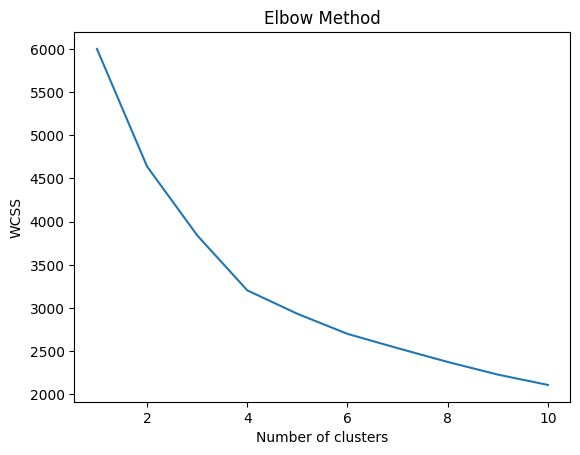

In [107]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [108]:
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
kmeans.fit(X)

KMeans(n_clusters=3, random_state=42)

In [116]:
labels = kmeans.predict(X)
reduced_means = reduced_data.copy()

In [117]:
reduced_means['Cluster'] = labels

In [118]:
reduced_means

,AGE,HbA1c,Chol,TG,VLDL,BMI,CLASS,Cluster
0,73,6.9,5.3,1.4,0.6,28.0,2,0
1,60,8.8,4.5,2.2,1.1,34.0,2,0
2,55,13.2,3.9,1.3,0.6,34.0,2,0
3,54,3.0,1.2,0.7,1.5,33.0,2,1
4,52,11.0,4.0,1.1,0.8,28.0,2,0
...,...,...,...,...,...,...,...,...
995,57,9.2,5.4,1.2,0.5,32.0,2,0
996,52,12.8,4.8,4.0,1.8,36.6,2,0
997,51,6.8,5.9,2.6,1.2,33.0,2,0
998,62,10.7,5.3,2.7,1.2,29.0,2,0


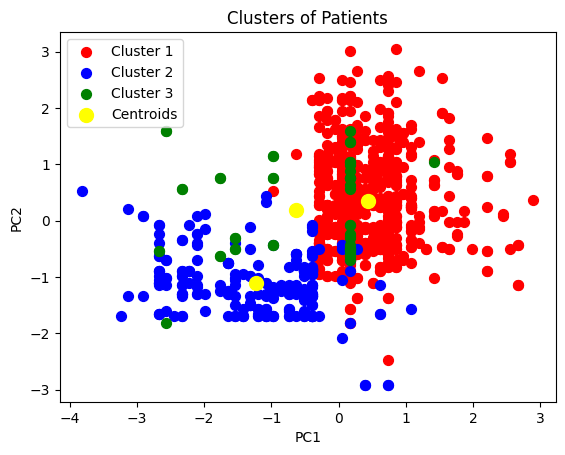

In [123]:
#visualizing gthe result
plt.scatter(X[labels == 0, 0], X[labels == 0, 1], s = 50, c = 'red', label = 'Cluster 1')
plt.scatter(X[labels == 1, 0], X[labels == 1, 1], s = 50, c = 'blue', label = 'Cluster 2')
plt.scatter(X[labels == 2, 0], X[labels == 2, 1], s = 50, c = 'green', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'yellow', label = 'Centroids')
plt.title('Clusters of Patients')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

In [ ]:
#scaled_acc = acc_score9dat

In [34]:
from sklearn.preprocessing import StandardScaler

In [35]:
scaler = StandardScaler()

In [36]:
data_with_scale = data_db.copy()

In [74]:
X

array([[ 2.21402542, -0.54532336,  0.33601148, -0.67806268, -0.34264878,
        -0.3181552 ],
       [ 0.73588602,  0.20485358, -0.27885925, -0.10682802, -0.20610268,
         0.89154507],
       [ 0.16737086,  1.94210545, -0.7400123 , -0.74946701, -0.34264878,
         0.89154507],
       ...,
       [-0.28744126, -0.58480636,  0.79716453,  0.17878931, -0.17879346,
         0.68992836],
       [ 0.96329208,  0.95503052,  0.33601148,  0.25019364, -0.17879346,
        -0.11653849],
       [ 0.16737086, -1.09808532,  0.79716453, -0.24963668, -0.26072112,
         0.08507822]])

In [40]:
data_with_scale = scaler.fit_transform(data_db)

In [41]:
data_with_scale

array([[ 0.70543451, -0.06991912,  0.87744601, ..., -0.34264878,
        -0.3181552 ,  0.41058438],
       [ 0.68878708, -0.06991498,  0.87744601, ..., -0.20610268,
         0.89154507,  0.41058438],
       [-0.35167679, -0.06560788,  0.87744601, ..., -0.34264878,
         0.89154507,  0.41058438],
       ...,
       [-1.22566644, -0.07711845,  0.87744601, ..., -0.17879346,
         0.68992836,  0.41058438],
       [-0.05618505, -0.06714291, -1.13967126, ..., -0.17879346,
        -0.11653849,  0.41058438],
       [-1.04670666, -0.07041186,  0.87744601, ..., -0.26072112,
         0.08507822,  0.41058438]])

In [124]:
unscaled_data = reduced_data.drop("CLASS", axis = 1)

In [125]:
unscaled_acc = acc_score(unscaled_data, label_db)

In [128]:
scaled_data = pd.DataFrame(X)

In [131]:
scaled_data.columns = reduced_data.drop("CLASS", axis = 1).columns

In [132]:
scaled_data

,AGE,HbA1c,Chol,TG,VLDL,BMI
0,2.214025,-0.545323,0.336011,-0.678063,-0.342649,-0.318155
1,0.735886,0.204854,-0.278859,-0.106828,-0.206103,0.891545
2,0.167371,1.942105,-0.740012,-0.749467,-0.342649,0.891545
3,0.053668,-2.085160,-2.815201,-1.177893,-0.096866,0.689928
4,-0.173738,1.073480,-0.663153,-0.892276,-0.288030,-0.318155
...,...,...,...,...,...,...
995,0.394777,0.362786,0.412870,-0.820871,-0.369958,0.488312
996,-0.173738,1.784173,-0.048283,1.178450,-0.014938,1.415749
997,-0.287441,-0.584806,0.797165,0.178789,-0.178793,0.689928
998,0.963292,0.955031,0.336011,0.250194,-0.178793,-0.116538


In [134]:
scaled_acc = acc_score(scaled_data, label_db)

In [135]:
scaled_acc

,Classifier,Accuracy
0,KNeighbors,0.932
1,Support vector Machine,0.928
2,Logistic,0.920


In [136]:
X_train, X_test, Y_train, Y_test = split(scaled_data, label_db)

In [137]:
X_train

,AGE,HbA1c,Chol,TG,VLDL
82,-0.401144,-1.690330,-0.970589,-0.749467,-0.342649
991,0.394777,0.915548,0.797165,-0.535254,-0.315340
789,0.849589,-0.111010,1.335176,1.535472,0.039680
894,-1.083362,-1.098085,3.564083,-0.463850,-0.342649
398,-0.060035,1.784173,0.182294,0.464407,-0.151484
...,...,...,...,...,...
106,-0.401144,-0.900670,-0.663153,-0.178232,-0.260721
270,0.508480,0.639167,0.259153,-0.392445,-0.342649
860,0.167371,-0.624289,-1.124307,-1.177893,-0.424576
435,0.622183,-0.111010,0.489729,0.107385,-0.206103


In [138]:
testmodel = LogisticRegression(max_iter = 1000)
testmodel.fit(X_train, Y_train)
y_pred = testmodel.predict(X_test)

In [139]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [140]:
cm = confusion_matrix(Y_test, y_pred, labels = ['Y', 'N', 'P'])

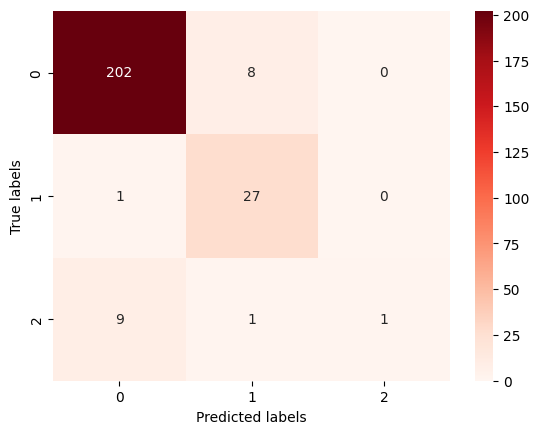

In [141]:
# Create a heatmap to visualize the confusion matrix
sns.heatmap(cm, annot=True, cmap='Reds', fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

In [142]:
print(cm)

[[202   8   0]
 [  1  27   0]
 [  9   1   1]]


In [143]:
logmodel = LogisticRegression(max_iter = 1000)

In [ ]:
X_train, X_test, Y_train, Y_test = split(data_with_scale, label_db)

In [144]:
chromo_df_bc,score_bc=generations(scaled_data,label_db,size=80,n_feat= X_train.shape[1], n_parents=64,mutation_rate=0.20,n_gen=5, X_train = X_train,X_test = X_test,Y_train = Y_train,Y_test = Y_test)

Best score in generation 1 : [0.924]
Best score in generation 2 : [0.924]
Best score in generation 3 : [0.924]
Best score in generation 4 : [0.924]
Best score in generation 5 : [0.924]
